## Observations and Insights 

Please note: I did not have adequate time to complete this assignment so you will see that it is either not yet working (everything below the Summary Statistics Subhead) or missing entirely. I intend to resubmit at a later date when I have the opportunity to work on this. Apologies.

The following observations and insights are stemming from the data uploaded in the homework starter file with sample plots:

1. While fewer female than male mice were studied (2% difference), this small difference should not indicate that the treatment effectiveness would vary by sex.
2. Drugs with more measurements taken (Capomulin and Ramicane) had a lower mean tumor volume, which may suggest that more data would reduce the mean volume in other drugs. Something to explore in further testing.
3. In the Capomulin example for mouse l509, the tumor volume begins to increase after about 35 days. Seeing more data on how tumors behave using this drug after 35 days would help inform whether the effects are long term or dosage adjustments are needed.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")

# Display the data table for preview
all_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice.
mice = len(all_df['Mouse ID'].unique())
mice

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Source: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = all_df[all_df.duplicated(['Mouse ID', 'Timepoint'])] 
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
#Find all indexes for the duplicate mouse. Source: https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexNames = all_df[all_df['Mouse ID'] == "g989"].index
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (Same source as above.)
mice_df = all_df.drop(indexNames , inplace=True)
mice_df = all_df

In [45]:
# Checking the number of mice in the clean DataFrame to confirm the mouse with duplicate data was dropped. 
mice = len(mice_df['Mouse ID'].unique())
mice

248

## Summary Statistics

In [26]:
#Calculate summary statistics
mean_tv = np.mean(mice_df['Tumor Volume (mm3)'])


median_tv = np.median(mice_df['Tumor Volume (mm3)'])



# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mean = mice_df.groupby(['Drug Regimen']).mean(['Tumor Volume (mm3)'])
median = mice_df.groupby(['Drug Regimen']).median(['Tumor Volume (mm3)'])
variance = np.var(mice_df['Drug Regimen'],ddof = 0)
variance

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#summary_data_df = pd.DataFrame({
 #   "Drug Regimin": mice_df.groupby(['Drug Regimen']),
  #  "Mean Tumor Volume": mice_df.groupby(['Drug Regimen']).mean(['Tumor Volume (mm3)']),
   # "Median Tumor Volume": mice_df.groupby(['Drug Regimen']).median(['Tumor Volume (mm3)'])
    #})
#summary_data_df


TypeError: could not convert string to float: 'Ramicane'

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [38]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Filter the DataFrame down only to those columns to chart

mice_drug = pd.DataFrame({
    "Drug Regimen1": mice_df['Drug Regimen'],
    "Mice": mice_df['Mouse ID'].value_counts() 
})

# Set the index for labels
mice_df = mice_drug.set_index('Drug Regimen1')


#mice_drug.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
#plt.title("Total Number of Unique Mice Tested by Drug Regimen")

#plt.show()
mice_drug.head(20)

KeyError: 'Drug Regimen'

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(mice_df['Drug Regimen'].unique())) 
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_df['Mouse ID'].unique(), color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, mice_df['Drug Regimen'].unique(), rotation="vertical")
plt.title("Total Number of Unique Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()


KeyError: 'Drug Regimen'

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Creates new data frame
gender_df = mice_df[['Mouse ID', 'Sex']]
gender_df = gender_df.drop_duplicates()
#gender_df = gender_df.set_index("Sex")

gender_df['Sex'] = gender_df['Sex'].astype(float)
gender_df.plot(kind="pie", figsize=(20,3), y='Sex')

# Set a title for the chart
plt.title("Gender Distribution")

plt.show()
plt.tight_layout()


ValueError: could not convert string to float: 'Male'

ValueError: could not convert string to float: 'Male'

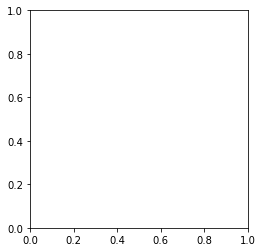

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(mice_df['Sex'], labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
